# Data exploration

In [10]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  
import pickle
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
sys.path.append('../DATA')

In [4]:
credit_data = pd.read_csv('../DATA/creditcard.csv')

In [5]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop('Class', axis=1), credit_data['Class'], test_size=0.3, random_state=42)

# Split the test set into validation and test sets (10% validation, 20% test)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.67, random_state=42)


Podemos observar unos datos solamente numericos aptos para ingresar directamente en un modelo. pero sin embargo vamos a hacerle una serie de transformaciones previas

In [6]:
# Create an instance of PCA with the desired number of components
pca = PCA(n_components=3)

# Fit the PCA model to the data
pca.fit(credit_data)

# Transform the data to the principal components
credit_data_pca = pca.transform(credit_data)

# Print the transformed data
print(credit_data_pca)


[[ 9.48138629e+04  5.59794671e+01  7.43234574e-01]
 [ 9.48138546e+04 -9.09536597e+01 -1.42895795e+00]
 [ 9.48128757e+04  2.85024840e+02  2.57517457e-01]
 ...
 [-7.79741415e+04 -1.61186800e+01 -1.41068388e+00]
 [-7.79741447e+04 -7.39987151e+01  6.24950139e-01]
 [-7.79781331e+04  1.33004366e+02  6.33399214e-01]]


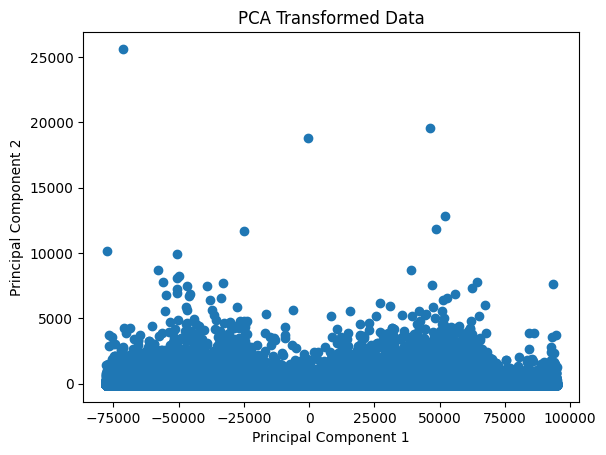

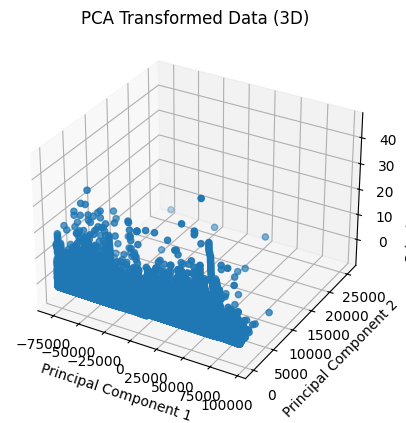

In [7]:
from mpl_toolkits.mplot3d import Axes3D
# Create a scatter plot of the transformed data
plt.scatter(credit_data_pca[:, 0], credit_data_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')
# Create a 3D scatter plot of the transformed data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(credit_data_pca[:, 0], credit_data_pca[:, 1], credit_data_pca[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Transformed Data (3D)')

# Show the plot
plt.show()


Luego de visualizar los datos totalmente encriptados, me dispongo a realizar una estandarizacion para generar un entrenamiento adecuado

In [9]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
pickle.dump(scaler, open('scaler.pkl', 'wb'))


In [11]:
# Define the parameter grid for each model
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

lr_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

# Create the models
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

# Perform random search with 10 iterations for each model
xgb_random_search = RandomizedSearchCV(xgb_model, xgb_param_grid, scoring='f1', n_iter=10, cv=5)
rf_random_search = RandomizedSearchCV(rf_model, rf_param_grid, scoring='f1', n_iter=10, cv=5)
lr_random_search = RandomizedSearchCV(lr_model, lr_param_grid, scoring='f1', n_iter=10, cv=5)

# Fit the models
xgb_random_search.fit(X_train, y_train)
rf_random_search.fit(X_train, y_train)
lr_random_search.fit(X_train, y_train)

# Get the best models
best_xgb_model = xgb_random_search.best_estimator_
best_rf_model = rf_random_search.best_estimator_
best_lr_model = lr_random_search.best_estimator_

# Evaluate the models on the validation set
y_val_pred_xgb = best_xgb_model.predict(X_val)
y_val_pred_rf = best_rf_model.predict(X_val)
y_val_pred_lr = best_lr_model.predict(X_val)

f1_xgb = f1_score(y_val, y_val_pred_xgb)
f1_rf = f1_score(y_val, y_val_pred_rf)
f1_lr = f1_score(y_val, y_val_pred_lr)

# Save the best model as a pickle file
if f1_xgb >= f1_rf and f1_xgb >= f1_lr:
    best_model = best_xgb_model
elif f1_rf >= f1_xgb and f1_rf >= f1_lr:
    best_model = best_rf_model
else:
    best_model = best_lr_model

pickle.dump(best_model, open('best_model.pkl', 'wb'))


KeyboardInterrupt: 